<a href="https://colab.research.google.com/github/Szymanskaola1998/data/blob/main/Wizualizacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Gr. Aleksandra Szymańska, Michał Sosnowski, Przemysław Oblinski**

#*Wypadki lotnicze na terenie Stanów Zjednoczonych*

Analizowany zbiór danych zawiera informację o wypadkach lotniczych od roku 1982 w lotnictwie cywilnym i wybranych incydentach na terenie Stanów Zjednoczonych, ich terytoriów i posiadłości oraz na wodach międzynarodowych.

# **ZMIENNE**#

Baza danych zawiera 8146 obserwacji, którą badano według 17 kryteriów. 
Po optymalizacji liczby zmiennych końcowo zdarzenia zostały analizowane według 15 kryteriów, które opisano poniżej.

**1. Typ zdarzenia** - typ zdarzenia dzieli się na wypadek (98,5%) oraz incydent (1,5%)

**2. Data**  - data zdarzenia (1982 - 2020)

**3. Lokalizacja** - 8146 lokalizacji na terenie których występowały wypadki

**4. Kraj** - zmienna dzieli się w 93% na Stany Zjednoczone, 0% Meksyk oraz 7% inne

**5. Skala** - zmienna dzieli się na wypadki śmiertelne, nieśmiertelne, incydent

**6. Stan Maszyny** - określa stopień szkód maszyny po wypadku (zniszczony, istotny, mały, nieznany)

**7. Typ Maszyny** - kategoria samolotu np. helikopter, samolot

**8. Make** - firma/ marka samolotu

**9. Amatorska Budowa**  - zmienna binarna (tak/nie) odpowiada czy maszyna była amatorsko zbudowana

**10. Liczba Silników**  - ilość silników w samolocie

**11. Cel Lotu**  - określa cel lotu pasażerów. (np. osobista, biznsowa, straż pożarna)

**12. Linia Lotnicza**  - przewoźnik lotniczy dla których występowały wypadki

**13. Ilość ofiar śmiertelnych**  - liczba ofiar śmiertelnych w danym wypadku

**14. Ilość ciężko rannych**  - liczba ofiar ciężko rannych w danym wypadku 

**15. Ilość lekko rannych** - liczba ofiar lekko rannych w danym wypadku



# **IMPORT DANYCH**








In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Samoloty.xlsx to Samoloty.xlsx
User uploaded file "Samoloty.xlsx" with length 853593 bytes


## **Pakiety** 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


### Pakiety do czwartego wykresu - Wykres liniowy + regresja

In [3]:
import seaborn as sns
sns.set()

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd

### Pakiety wykres kołowy

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import pandas as pd
import plotly.express as px
import matplotlib
from google.colab import drive

### Pakiety wykres kafelkowy

In [53]:
!pip install PyWaffle

     |████████████████████████████████| 565 kB 20.5 MB/s 




## **Dane przed optymalizacją zmiennych** 



In [8]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [27]:
!pip install -q xlrd
import pandas as pd
df = pd.read_excel('Samoloty.xlsx')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,20200923X84757,Accident,ERA20LA330,2020,"Floral City, FL",United States,Fatal,Destroyed,Airplane,Piper,N,1,Aerial Application,CONSOLIDATED AG PILOT SERVICES LLC.,1,0,0
1,20200923X30413,Accident,WPR20CA316,2020,"Pacific City, OR",United States,Non-Fatal,Substantial,Airplane,Piper,N,1,Personal,Ricardo Byers,0,0,0
2,20200922X94309,Accident,ERA20LA333,2020,"Jackson, TN",United States,Non-Fatal,Substantial,Airplane,Ayres,N,1,Aerial Application,AirWorks LLC,0,0,0
3,20200922X00441,Accident,CEN20CA416,2020,"Lafayette, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,N,1,Instructional,Purdue Aviation Llc,0,0,0
4,20200920X32151,Accident,WPR20CA313,2020,"Somerton, AZ",United States,Non-Fatal,Destroyed,Airplane,Air Tractor,N,1,Aerial Application,Tri-Rotor Spray & Chemical,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,20201002102072,Accident,WPR21LA002,2020,"Burlington, WA",United States,Non-Fatal,Substantial,Airplane,ZENITH,Y,1,Flight Test,Stuart C. Ashley,0,1,0
8142,20201001102067,Incident,ENG20LA046,2020,"Donalsonville, GA",United States,Non-Fatal,Minor,Airplane,Thrush,N,1,Aerial Application,Custom Ag and Air Inc.,0,0,0
8143,20201001102064,Accident,CEN20LA427,2020,"Hinckley, IL",United States,Non-Fatal,Substantial,Glider,SCHLEICHER,N,0,Personal,Windy City Soaring Association,0,0,0
8144,20200930102061,Accident,WPR20LA324,2020,"Lake Abert, OR",United States,Non-Fatal,Substantial,Airplane,Pilatus Aircraft,N,1,Personal,Rivers End Ranch LLC,0,0,0


## **Przekształcenia**





In [28]:
# Usuwanie kolumn
df = df.drop(["Event.Id"], axis=1)


In [29]:
df = df.drop(["Accident.Number"], axis=1)

In [30]:
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Amateur.Built,Number.of.Engines,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,Accident,2020,"Floral City, FL",United States,Fatal,Destroyed,Airplane,Piper,N,1,Aerial Application,CONSOLIDATED AG PILOT SERVICES LLC.,1,0,0
1,Accident,2020,"Pacific City, OR",United States,Non-Fatal,Substantial,Airplane,Piper,N,1,Personal,Ricardo Byers,0,0,0
2,Accident,2020,"Jackson, TN",United States,Non-Fatal,Substantial,Airplane,Ayres,N,1,Aerial Application,AirWorks LLC,0,0,0
3,Accident,2020,"Lafayette, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,N,1,Instructional,Purdue Aviation Llc,0,0,0
4,Accident,2020,"Somerton, AZ",United States,Non-Fatal,Destroyed,Airplane,Air Tractor,N,1,Aerial Application,Tri-Rotor Spray & Chemical,0,0,0


In [31]:
#liczenie wierszy i kolumn
df.shape

(8146, 15)

In [32]:
# Zmiana nazw kolumn (wcześniej robiliśmy to za pomocą df.columns i zmienialiśmy wszystkie)
df = df.rename({
    # old name     new name 
    "Investigation.Type": "Typ zdarzenia",
            "Event.Date": "Data",
                "Location": "Lokalizacja",
                    "Country": "Kraj",
                    "Injury.Severity": "Skala",
                    "Aircraft.damage": "Stan Maszyny",
                    "Aircraft.Category": "Typ Maszyny",
                    "Amateur.Built": "Amatorska Budowa",
                    "Number.of.Engines": "Liczba_Silnikow",
                    "Purpose.of.flight": "Cel Lotu",
                    "Air.carrier": "Linia Lotnicza",
                    "Total.Fatal.Injuries": "Ilosc_ofiar_smiertelnych",
                    "Total.Serious.Injuries": "Ilość ciężko rannych",
                    "Total.Minor.Injuries": "Ilość lekko rannych",
}, axis=1)
df.head()

,Typ zdarzenia,Data,Lokalizacja,Kraj,Skala,Stan Maszyny,Typ Maszyny,Make,Amatorska Budowa,Liczba_Silnikow,Cel Lotu,Linia Lotnicza,Ilosc_ofiar_smiertelnych,Ilość ciężko rannych,Ilość lekko rannych
0,Accident,2020,"Floral City, FL",United States,Fatal,Destroyed,Airplane,Piper,N,1,Aerial Application,CONSOLIDATED AG PILOT SERVICES LLC.,1,0,0
1,Accident,2020,"Pacific City, OR",United States,Non-Fatal,Substantial,Airplane,Piper,N,1,Personal,Ricardo Byers,0,0,0
2,Accident,2020,"Jackson, TN",United States,Non-Fatal,Substantial,Airplane,Ayres,N,1,Aerial Application,AirWorks LLC,0,0,0
3,Accident,2020,"Lafayette, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,N,1,Instructional,Purdue Aviation Llc,0,0,0
4,Accident,2020,"Somerton, AZ",United States,Non-Fatal,Destroyed,Airplane,Air Tractor,N,1,Aerial Application,Tri-Rotor Spray & Chemical,0,0,0


In [33]:
#Sprawdzenie
df.shape

(8146, 15)

In [16]:
# Typy danych. czy wszystkie typy są ok?
df.dtypes

Typ zdarzenia               object
Data                         int64
Lokalizacja                 object
Kraj                        object
Skala                       object
Stan Maszyny                object
Typ Maszyny                 object
Make                        object
Amatorska Budowa            object
Liczba_Silnikow              int64
Cel Lotu                    object
Linia Lotnicza              object
Ilosc_ofiar_smiertelnych     int64
Ilość ciężko rannych         int64
Ilość lekko rannych          int64
dtype: object


## **Dane po optymalizacji zmiennych** 

In [34]:
df.head()

,Typ zdarzenia,Data,Lokalizacja,Kraj,Skala,Stan Maszyny,Typ Maszyny,Make,Amatorska Budowa,Liczba_Silnikow,Cel Lotu,Linia Lotnicza,Ilosc_ofiar_smiertelnych,Ilość ciężko rannych,Ilość lekko rannych
0,Accident,2020,"Floral City, FL",United States,Fatal,Destroyed,Airplane,Piper,N,1,Aerial Application,CONSOLIDATED AG PILOT SERVICES LLC.,1,0,0
1,Accident,2020,"Pacific City, OR",United States,Non-Fatal,Substantial,Airplane,Piper,N,1,Personal,Ricardo Byers,0,0,0
2,Accident,2020,"Jackson, TN",United States,Non-Fatal,Substantial,Airplane,Ayres,N,1,Aerial Application,AirWorks LLC,0,0,0
3,Accident,2020,"Lafayette, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,N,1,Instructional,Purdue Aviation Llc,0,0,0
4,Accident,2020,"Somerton, AZ",United States,Non-Fatal,Destroyed,Airplane,Air Tractor,N,1,Aerial Application,Tri-Rotor Spray & Chemical,0,0,0


In [35]:
df.shape

(8146, 15)

**Wczytany zbiór ma 8146 wierszy oraz 15 kolumn**

# **WIZUALIZACJA**

## **Podstawowe statystyki**

In [19]:
df.Lokalizacja.value_counts()

Anchorage, AK       30
Phoenix, AZ         29
Palmer, AK          28
Fairbanks, AK       27
Talkeetna, AK       26
                    ..
Tribune, KS          1
Piranhas, Brazil     1
Holton, KS           1
Hanley Falls, MN     1
Lago Vista, TX       1
Name: Lokalizacja, Length: 4542, dtype: int64

**Wniosek:** Najwięcej wypadków miały miejsce w Anchorage, na drugim miejscu jest Phoenix, a podium zamyka Palmer.

,Data,Liczba_Silnikow,Ilosc_ofiar_smiertelnych,Ilość ciężko rannych,Ilość lekko rannych
count,7530.000000,7530.000000,7530.00000,7530.000000,7530.000000
mean,2012.347410,1.069588,0.20332,0.208632,0.130943
std,3.578933,0.313409,0.51485,0.498269,0.393683
min,1993.000000,0.000000,0.00000,0.000000,0.000000
25%,2010.000000,1.000000,0.00000,0.000000,0.000000
50%,2012.000000,1.000000,0.00000,0.000000,0.000000
75%,2014.000000,1.000000,0.00000,0.000000,0.000000
max,2021.000000,3.000000,2.00000,2.000000,2.000000


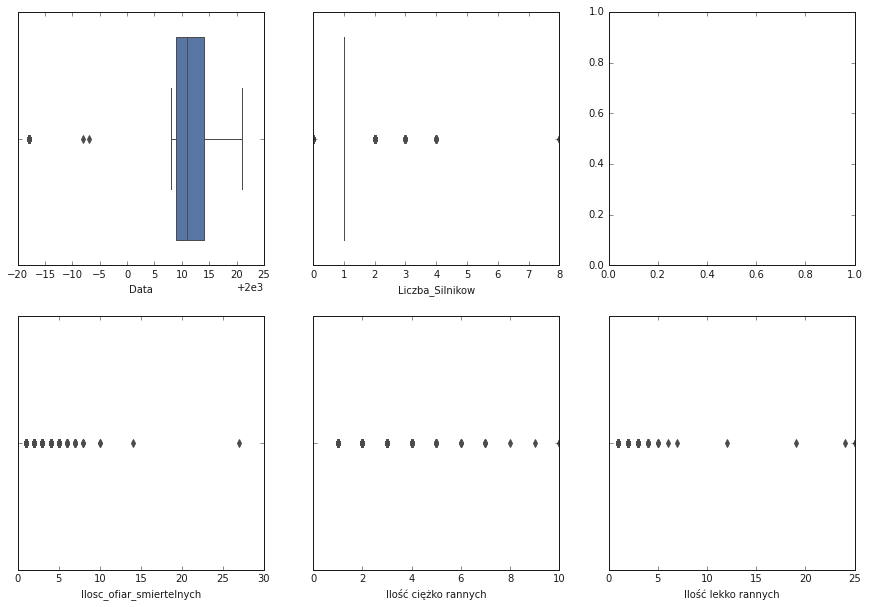

In [20]:

from seaborn.external.husl import f
f, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(x="Data", data=df, ax=axes[0, 0])
sns.boxplot(x="Liczba_Silnikow", data=df, ax=axes[0, 1])
sns.boxplot(x="Ilosc_ofiar_smiertelnych", data=df, ax=axes[1, 0])
sns.boxplot(x="Ilość ciężko rannych", data=df,ax=axes[1, 1])
sns.boxplot(x="Ilość lekko rannych", data=df, ax=axes[1, 2])
nazwa_kol = ['Data','Liczba_Silnikow','Ilosc_ofiar_smiertelnych','Ilość ciężko rannych', 'Ilość lekko rannych']
Q1 = df[nazwa_kol].quantile(0.10)
Q3 = df[nazwa_kol].quantile(0.90)
IQR = Q3 - Q1
df = df[~((df[nazwa_kol] < (Q1 - 1.5 * IQR)) |(df[nazwa_kol] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

**Wniosek:** Na box plotach widzimy, że dla większości zmiennych w zbiorze występuje dużo wartości odstających.

## **Pierwszy wykres**

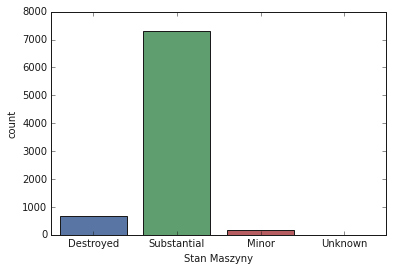

In [55]:
sns.countplot(x="Stan Maszyny", data=df)

**X** - "Stan Maszyny"

---

**Wioski:** 

Najwięcej wyników dla stanu maszyn po wypadku dla analizowanej bazy danych osiągnięto dla istotnych zniszczeń. Można zauważyć ogromną przewagę nad innymi charkterami zniszczeń. Na drugim miejscu znajduje się całkowite zniszczenie maszyn.

## **Drugi wykres - interaktywny wykres**

In [22]:
#Scatter plot - dwie zmienne, które sobie wybieramy oraz z mozliwością zmiany typu wykresu

@interact
def plot(x=list(df.columns), y=list(df.columns), figtype=["scatter", "bar", "hist", "barh", "kde"]):
    plt.figure(figsize=(20,8))
    if figtype == "bar":
      g = sns.barplot(x=x, y=y, dodge=False, data=df)
      for item in g.get_xticklabels():
        item.set_rotation(80)
    elif figtype =="scatter":
      g = sns.scatterplot(x=x, y=y,data=df)
    else:
      g = sns.displot(x=x, y=y, data=df, kind = figtype)

interactive(children=(Dropdown(description='x', options=('Typ zdarzenia', 'Data', 'Lokalizacja', 'Kraj', 'Skal…

1. * x - "Data"
   * y - "Ilość ofiar śm."
   * figtype - "bar"

**Wnioski:** 

Najwięcej ofiar śmiertelnych zanotowano w 1992 roku. Liczba znacząco przewyższa nad pozostałymi latami, bo osiąga ponad 25 ofiar śmiertelnych.

---


2. * x - "Typ maszyny"
   * y - "Ilość ofiar śmiertelnych"
   * figtype - "bar"
   

**Wnioski:** 

Rozkład ofiar smiertelnych ze względu na typ maszyny można zauważyć najwyższy na ***Weight-Shift***

## **Trzeci wykres - interaktywna tabela**

Na poniższej wizualizacji pojawia się tabela dla której możemy wybrać według której zmiennej chcemy filtrować dane oraz przesuwakiem okraślamy powyżej jakiej liczby chcemy widzieć wyniki tej zmiennej.

In [36]:
@interact
def show_titles_more_than(x=(0, 30, 1),
                          column=list(df.select_dtypes('number').columns), 
                          ):
    display(df.loc[df[column] > x, ['Data', 'Kraj', 'Typ Maszyny', 'Cel Lotu', 'Ilosc_ofiar_smiertelnych', 'Ilość lekko rannych']])

interactive(children=(IntSlider(value=15, description='x', max=30), Dropdown(description='column', options=('D…


* Columna "Ilość ofiar śmiertelnych"

* x - 10

   

**Wnioski:**

Filtrująć dane ze względu na ilość ofiar śmiertelnych w wypadku dla których liczba ofiar wynosiła powyżej 10 osób, widzimy, że w naszej bazie danych są tylko dwa tego typu zdarzenia.

---

## **Czwarty wykres - wykres liniowy + regresja**

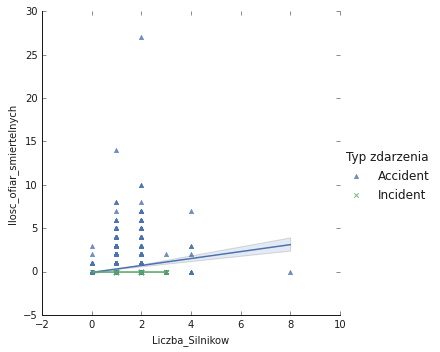

In [68]:

g = sns.lmplot(
    data=df,
    x="Liczba_Silnikow", y="Ilosc_ofiar_smiertelnych", hue="Typ zdarzenia",
    height=5, markers=["^", "x"]
)


 * x - "Liczba Silników"
 * y - "Ilość ofiar śmiertelnych"

**Wnioski:** 


Ta wizualizacja bada interakcje między trzema zmiennymi. Zależność między liczbą silników a ilości ofiar śmiertelnych dla typu zdarzenia. Wraz ze wzrostem ilości silników w incydentach lotniczych nie idą ofiary śmiertelne, lecz w przypadku wypadków lotniczych (accident), występuje zależność. 

---

## **Piąty wykres - korelacja**

Text(0.5, 1.0, ' Wykres korelacji')

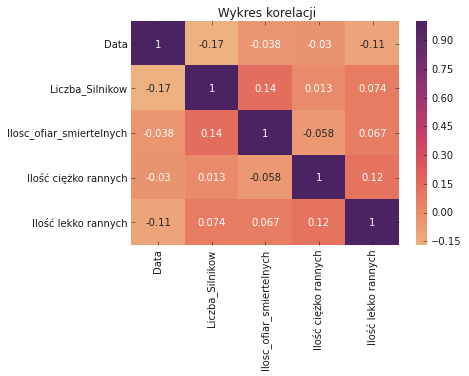

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='flare')
plt.title(' Wykres korelacji')

**Wnioski:**

Z analizy wykresu widzimy, że w omawianym zbiorze nie występują silne korelacje. Najwyższa korelacją (0,14) charakteryzuje się zmienna "Ilość ofiar śmiertelnych"

## **Szósty wykres - wykres kołowy**

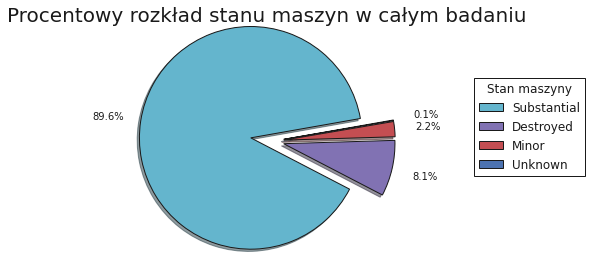

In [51]:
slices = [89.6, 8.1, 2.2, 0.1]

categories = ["Substantial", "Destroyed", "Minor", "Unknown"]

cols = ['c', 'm', 'r', 'b']
pie =  plt.pie (slices, 
           
           colors = cols, 
           startangle = 10, 
           shadow = True,
           explode = (0.2 , 0.1,0.1,0.1),
           autopct = '%1.1f%%',
           pctdistance=1.3)
plt.legend(categories, loc="center left",
           title = "Stan maszyny",
           bbox_to_anchor=(1.1, 0, 0.5, 1.1))
plt.axis('equal')
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")





plt.title('Procentowy rozkład stanu maszyn w całym badaniu', fontsize = 20)
plt.show()

**Wnioski:**

Blisko 90% maszyn po wypadku lub incydencie lotniczym ucierpiała *istotnemu* uszkodzeniu. 8% maszyn zostało zniszczonych. 2% wszystkich uszkodzeń wywołało nieznaczne straty. 

## **Siódmy wykres - wykres gęstości**

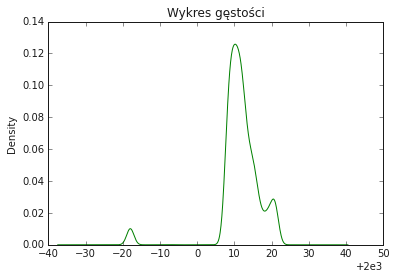

In [52]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading the dataset
# from seaborn library
# viewing the dataset
df.head()

# loading the dataset
# from seaborn library

# viewing the dataset
df.Data.plot.density(color='green')
plt.title('Wykres gęstości')
plt.show()


**Wnioski:**

Wykres gęstości wykorzystuje się do zaprezentowania rozkładu zmiennej numerycznej. Widzimy, że rozkład jest w kształcie dzwonu, dlatego możemy zinterpretować, że jest to rozkład normalny.

## **Ósmy wykres**

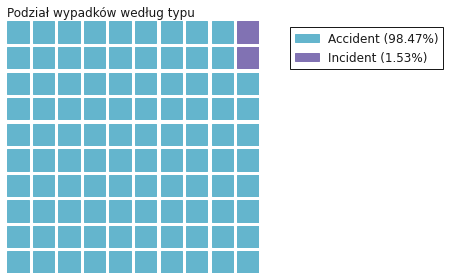

In [54]:
from pywaffle import Waffle
data = {'Accident': 98.47, 'Incident': 1.53}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    title={'label': 'Podział wypadków według typu', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    colors = ["c", "m"]
    
  
)

plt.show()

**Wnioski:**

Wykres kafelkowy zaprezentowany powyżej przestawia w jeszcze inny sposób udział wypadków do incydentów. Na 100 wyszczególnionych "kwadracików", incydenty z odsetkiem 1,53% zajmują tylko dwa kwadraty. Wykres kafelkowy to dobry sposób, żeby pokazać jak bardzo o wiele jest wypadków niż incydentów.

# **PODSUMOWANIE**#

Na podstawie powyższych wykresów możemy jasno powiedzieć, że zgłaszane przypadki w lotnictwie dotyczą w głównej mierzy wypadków niż incydentów (na podstawie ostatniego wykresu - na 100 zdarzeń tylko 2 incydenty). W ich skutek maszyny ulegały wyraźnemu zniszczeniu. Najsilniejsza korelacja została zauważona między liczbą ofiar wypadków a liczbą silników w samolocie (0,14 - jednak jest to słaba zależność między zmiennymi). Najwięcej wypadków miało miejsce na Alasce, co może być punktem wyjścia dla organów badania wypadków lotniczych do dalszych badań.